In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [10]:
#Loading dataset
wine = pd.read_csv('/home/ec2-user/jupyterlab/ml-study-tasks/winequality-red.csv')

In [11]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [15]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, shuffle = True, random_state = 42)

In [16]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [20]:
coeff_df = pd.DataFrame({'Coefficient': reg.coef_})
coeff_df.index = [['fixed acidity', 'volatile acidity', 'citric acid', 
                   'residual sugar', 'chlorides', 'free sulfur dioxide', 
                   'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
coeff_df

,Coefficient
fixed acidity,0.039789
volatile acidity,-0.179439
citric acid,-0.027512
residual sugar,0.009421
chlorides,-0.089084
free sulfur dioxide,0.058015
total sulfur dioxide,-0.120008
density,-0.019204
pH,-0.060610
sulphates,0.146815


In [21]:
reg.score(X_test,y_test)

0.40201256371442895

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(20)
df1

,Actual,Predicted
803,6,5.316049
124,5,5.015105
350,6,5.681277
682,5,5.428503
1326,6,5.691644
976,5,5.243349
1493,5,5.000051
706,5,5.073367
613,5,5.760756
1587,6,5.665826


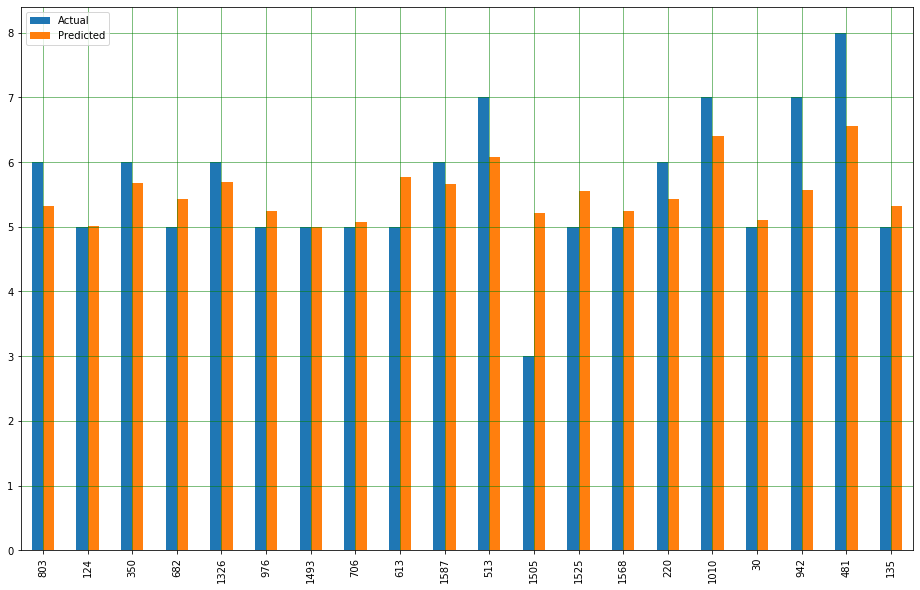

In [24]:
import matplotlib.pyplot as plt
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [38]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty=None, max_iter = 1000, random_state = 42)
sgd_reg.fit(X_train, y_train.ravel())
sgd_reg.score(X_train, y_train.ravel())

0.34715963710430575

In [40]:
from sklearn.svm import LinearSVR # I could have also used SVR with kernel="linear", but LinearSVR is faster

svm_reg_linear = LinearSVR(epsilon = 1, C = 1)

svm_reg_linear.fit(X_train, y_train.ravel())

svm_reg_linear.score(X_train, y_train.ravel())

0.3351479410482412

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
reg1 = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])
reg1.fit(X_train, y_train)
reg1.score(X_test, y_test)

0.40201256371442895

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

reg2 = Pipeline([('Scaler', StandardScaler()), ('Ridge', Ridge(alpha=0.05, solver="cholesky"))])
reg2.fit(X_train, y_train)
reg2.score(X_test, y_test)

0.4020116594995319

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

reg3 = Pipeline([('Scaler', StandardScaler()), ('Lasso', Lasso(alpha=0.05, random_state = 42))])
reg3.fit(X_train, y_train)
reg3.score(X_test, y_test)

0.3683371065534031

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

reg4 = Pipeline([('Scaler', StandardScaler()), ('ElasticNet', ElasticNet(alpha=0.005, l1_ratio = 0.5, random_state = 42))])
reg4.fit(X_train, y_train)
reg4.score(X_test, y_test)

0.40011418386510367

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
reg4 = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor(n_estimators=500, min_samples_split=2))])
reg4.fit(X_train, y_train)
reg4.score(X_test, y_test)

0.5229278620421705

In [31]:
reg4_eval = cross_val_score(estimator = reg4, X = X_train, y = y_train, cv = 10)
reg4_eval.mean()

0.45128414526785726